# Principal Component Analysis

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=52d7ha-GdV8&list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E&index=13

## Goal

PCA finds a new set of dimensions such that all the dimensions are orthogonal (and hence linearly independent) and ranked according to the variance of data along them.

Find a transform such that

+ The transformed features are linearly independent
+ Dimensionality can be reduced by taking only the dimensions with the Highest importance
+ Those newly found dimensions should minimize the projection error
+ The projected points should have maximum spread, i.e. maximum variance

## Notes
Our 2d data is distributed like this and we want to project it into 1d. What we want to do is we want to find the axis that are orthogonal to each other and when we project our data onto these axis then our new projected data should have the maximum spread. On the left side are the correct principal axis so if we project them in 1d so on the largest principal component if we project our data on this axis then they have the maximum spread. If we look on the right side we can see incorrect axis.

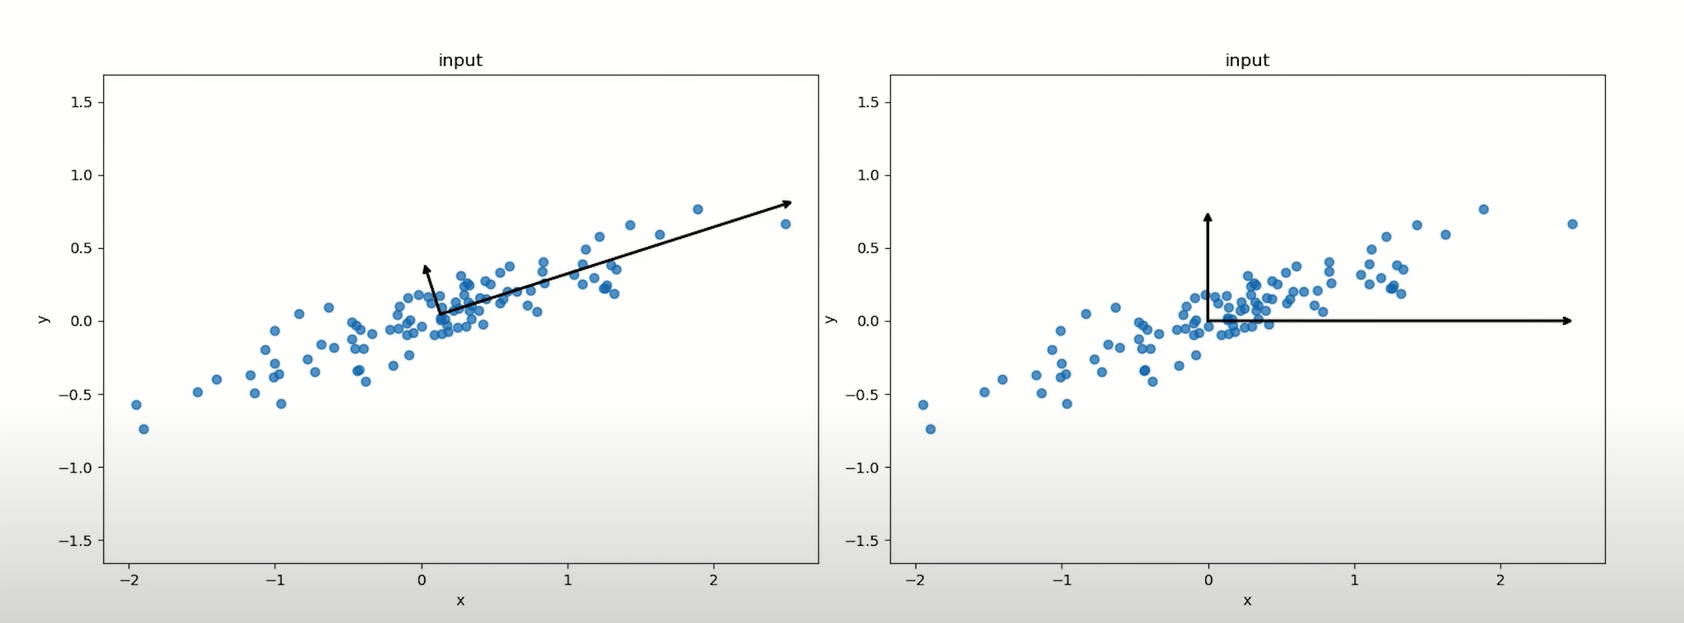

Let's look at how the projected data would look like for so on the right side we made it even worse and projected it on the y axes. These are clearly wrong because here we can see that a lot of data is on the same spots so we don't have any more information about them. On the left side the projected data has the maximum spread so we can contain most of the information about the data and also about the projection error which means this would be the lines from here to the axis. This is mini-mill where else and on the right side so here we have to make  a very long projection line for each point so the left side is the correct answer and now how do we find these prints principal components so for this we want to maximize the variance.

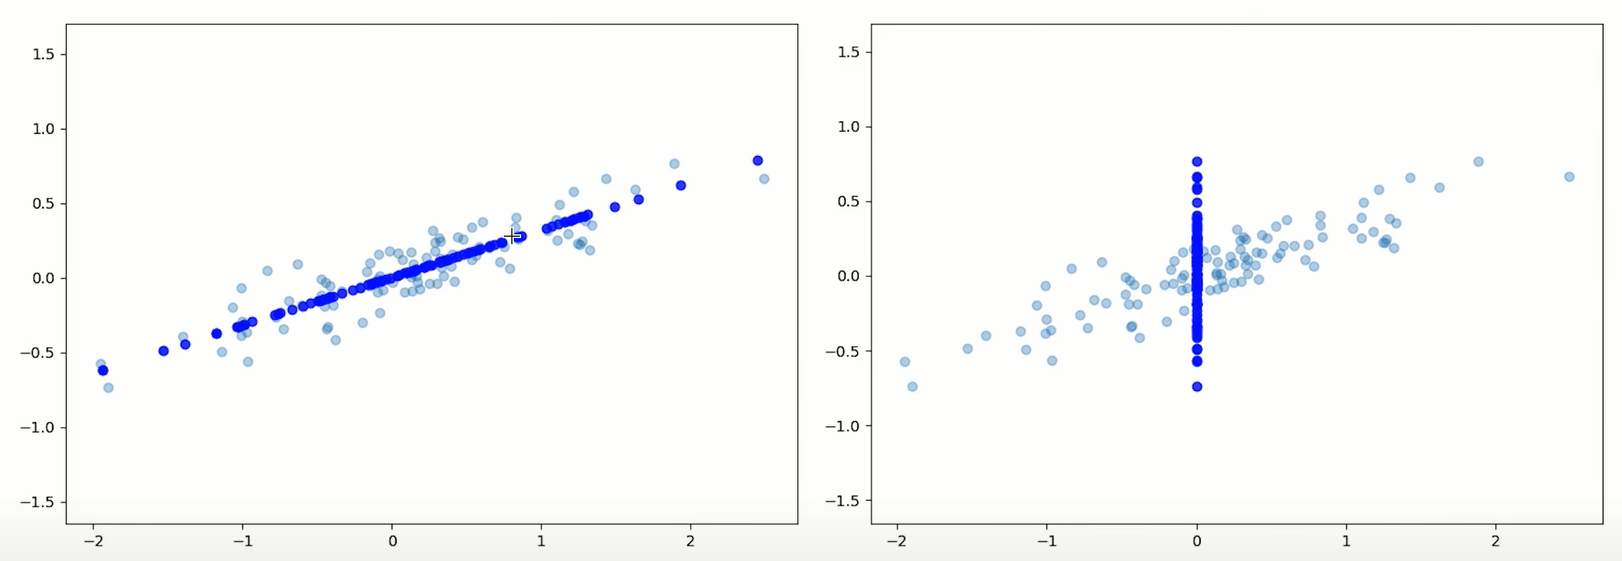

## Variance

How much variation or spread the data has.

### $ Var(X) = \frac{1}{n} \sum{(X_{i} - \bar{X})^2} $

## Notes

We need the variance of a sample X and this is calculated as 1 over the number of samples and then we have the sum over each component minus  X bar. X bar is the mean value so we subtract the mean value from our data set and now we also need a covariance matrix.

## Covariance Matrix

Indicates the level to which two variables vary together.

### $ Cov(X,Y) = \frac{1}{n} \sum{(X_{i} - \bar{X})(Y_{i} - \bar{Y})^T} $

### $ Cov(X,X) = \frac{1}{n} \sum{(X_{i} - \bar{X})(X_{i} - \bar{X})^T} $

## Notes

Covariance matrix indicates the level to which two variables vary together and  the covariance matrix of two variables is defined as above. In our case we want to have the covariance matrix with both of our X so this is also called the auto covariance matrix. We have to calculate this and then our problem is reduced to an eigen vector or eigenvalue problem.

## Eigenvector, Eigenvalues

The eigenvectors point in the direction of the maximum variance, and the corresponding eigenvalues indicates the importance of its corresponding eigen vector.

### $ A\vec{v} = \lambda\vec{v} $

## Notes

What we have to do is we have to find the eigenvectors and eigenvalues of this covariance matrix. The eigenvectors point then in the direction of the maximum variance and the corresponding eigen values indicate the importance of its corresponding eigenvector. Two vectors from left picture above correspond to the eigen bectors of the covariance matrix of our data set so this is what we have to do.

## Approach

+ Substract the mean from X
+ Calculate Cov(X,X)
+ Calculate eigenvectors and eigenvalues of covariance matrix
+ Sort the eigenvectors according to their eigenvalues in decreasing order
+ Choose first k eigenvectors and that will be the new k dimensions
+ Transform the original n dimensional data point into k dimensions (= Projections with dot product)

## Notes

One thing that is very nice about these principal component analysis and the eigenvectors is that they are all orthogonal of each other. This means that our new data  is then also linearly independent  so this is a nice little bonus if the PCA.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [7]:
class PCA:
    
    def __init__(self, n_components):
        self.n_components = n_components
        # preparing eigenvectors and mean
        self.components = None
        self.mean = None
        
    def fit(self, X):
        # mean
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        
        # calculate the covariance matrix
        # row = 1 sample, columns = features, cov function treat columns as samples so we have to transpose it
        cov = np.cov(X.T)
        
        # calculate the eigenvectors, eigenvalues
        # from documentation we know that eigenvectors are returned as column vectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # v[:, i]
        eigenvectors = eigenvectors.T
        
        # sort our eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        # store onyly first n eigenvectors
        self.components = eigenvectors[0:self.n_components]
        
    def transform(self, X):
        # project data
        X = X - self.mean
        # transpose because we want column vectore here
        return np.dot(X, self.components.T)

In [16]:
data = datasets.load_iris()
X = data.data
y = data.target

# dim 150, 4 -> 150 samples and 4 features
# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


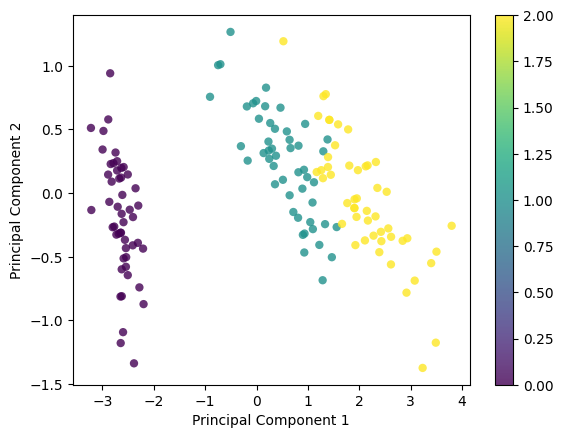

In [ ]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1,x2,
            c=y, edgecolor='none', alpha=0.8,
            cmap=plt.matplotlib.colormaps['viridis'])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

## Notes

Here we have our 4d feature vector transformed or projected into 2d and we see that all are all the three different classes are plotted in a different color so we can see that we can still have and easy separation of our classes.